<a href="https://colab.research.google.com/github/alex-bolshunov/Plant-Disease-Detection/blob/main/plant_disease_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from PIL import Image

In [2]:
LBL = "label"
IMG = "image_path"

In [3]:
#load plants dataset
!curl "https://raw.githubusercontent.com/alex-bolshunov/Plant-Disease-Detection/refs/heads/main/data/plants.csv" -o plants.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.5M  100 12.5M    0     0  11.2M      0  0:00:01  0:00:01 --:--:-- 11.2M


In [4]:
#loat path dataset
!curl "https://raw.githubusercontent.com/alex-bolshunov/Plant-Disease-Detection/refs/heads/main/data/paths.csv" -o paths.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  346k  100  346k    0     0   804k      0 --:--:-- --:--:-- --:--:--  804k


In [5]:
#get dataframe
df = pd.read_csv("plants.csv")
df_path = pd.read_csv("paths.csv")

In [6]:
%%capture

#mount drive
drive.mount('/content/drive')

In [7]:
#get classes
classes = df.loc[:, LBL].unique().tolist()

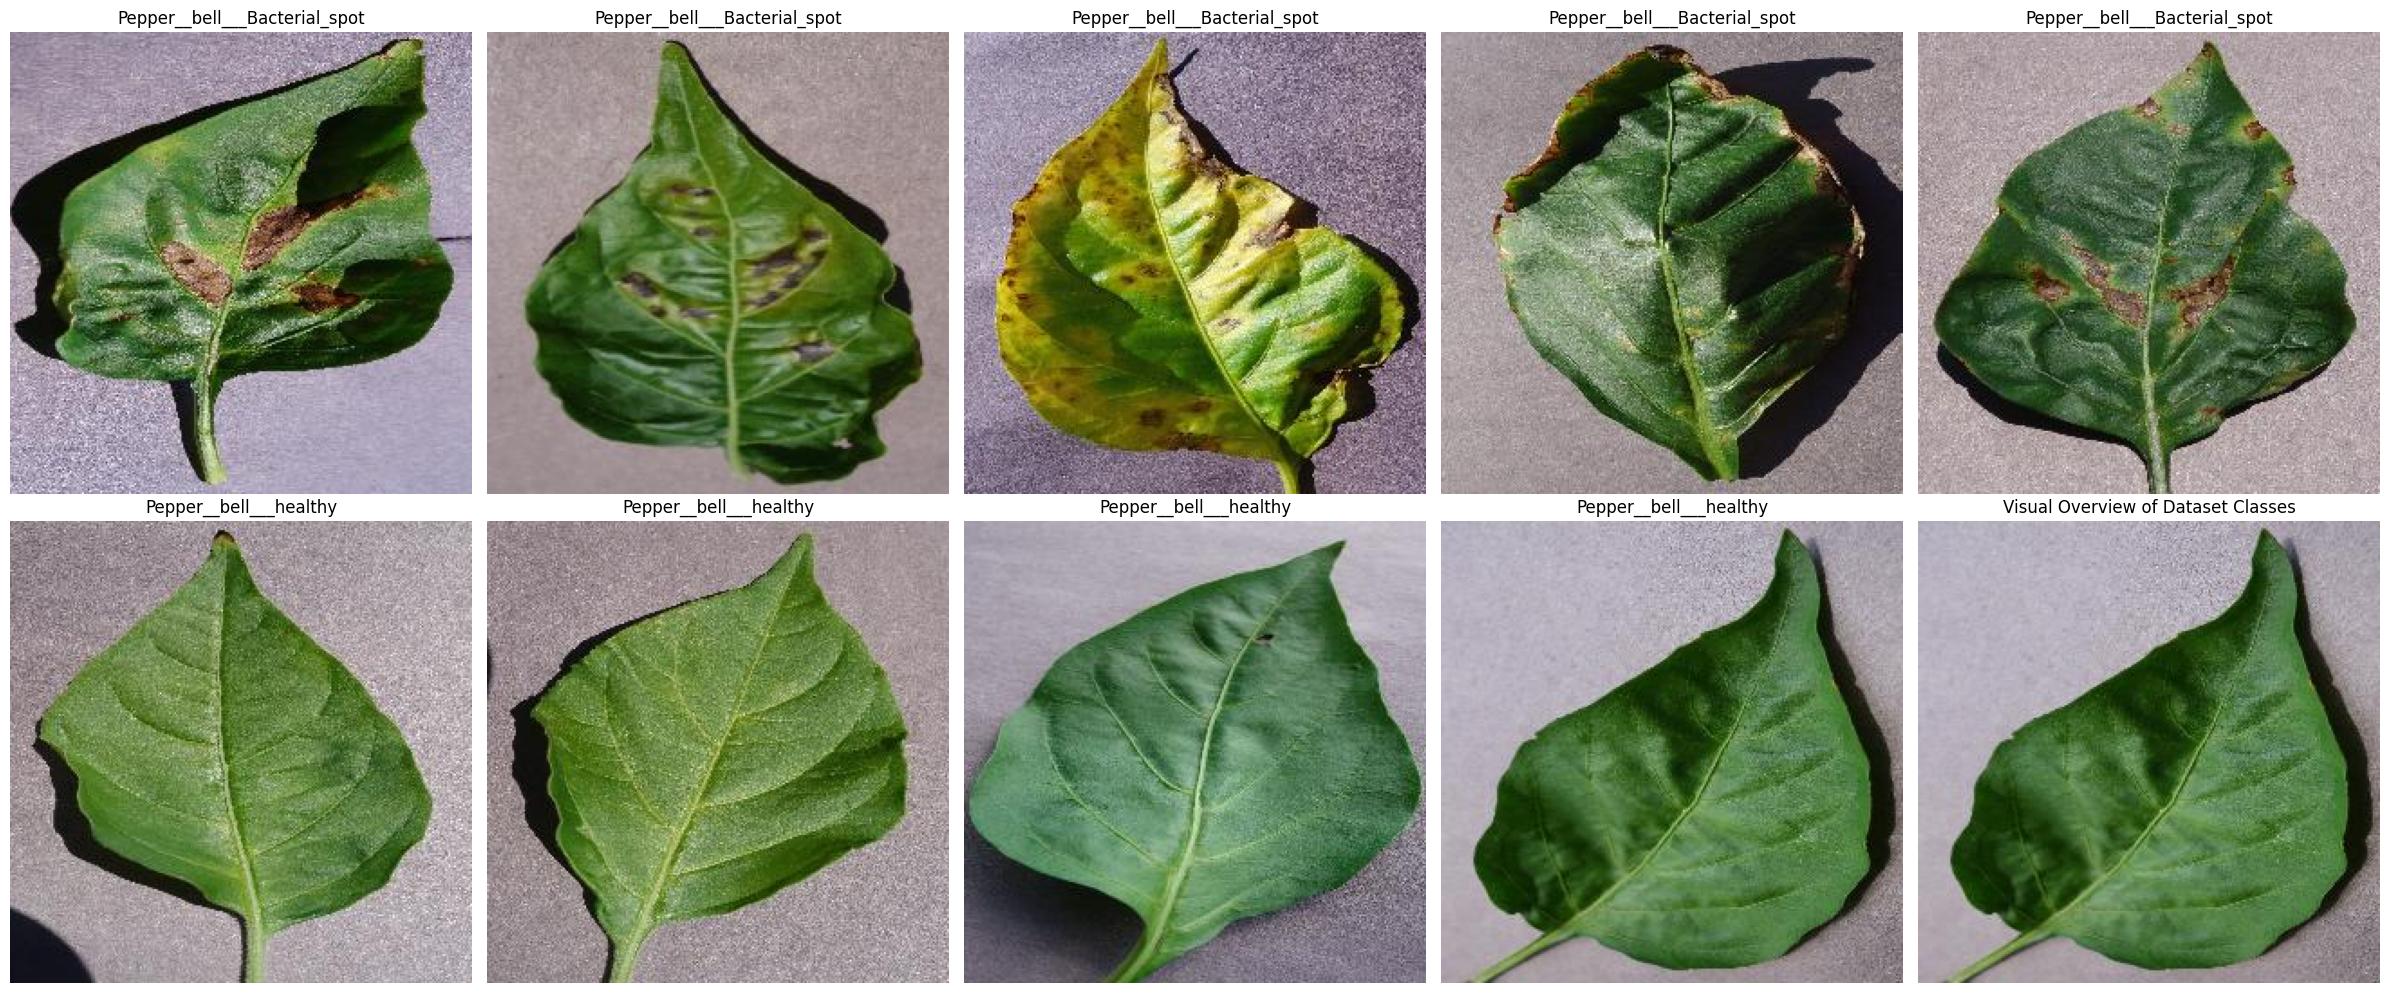

In [8]:
#define variables
num_img = 5
num_rows = len(classes)

pic_num = 0
class_index = 0
h = 10

#plot random set of pictures, each row represents a class
fig, axes = plt.subplots(num_rows, num_img, figsize = (h*2.4,h))
fig.subplots_adjust(hspace=0.3)

for ax in axes.flat:
  if (pic_num + 1) / num_img > class_index + 1: class_index += 1 #update class index
  img_index = np.random.choice(df_path.loc[df_path[LBL] == classes[class_index]].index)

  img_path = df_path.loc[img_index, IMG]
  title = df_path.loc[img_index, LBL]

  img = Image.open(img_path)
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(title)
  pic_num += 1

plt.title("Visual Overview of Dataset Classes")
plt.tight_layout()
plt.savefig("leaves.jpg", dpi=300)
plt.show()